In [1]:
import pandas as pd
#Google colab does not have pickle
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import seaborn as sns

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D,Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding,Concatenate
from keras.models import Model
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 13.1MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219257 sha256=d3402cf58fa2579b3fd1b9075759eb2ec6b92c88de48412a7915391f5b8216e4
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:

def load_data(randomize=False):
    try:
        with open("/content/drive/MyDrive/ML_Data/hyppi-train.pkl", "rb") as fh:
          df_train = pickle.load(fh)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open("/content/drive/MyDrive/ML_Data/hyppi-independent.pkl", "rb") as fh:
          df_test = pickle.load(fh)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test
df_train,df_test = load_data()

print('The data used will be:')
df_train

The data used will be:


,Human,Yersinia,Joined,label
0,"[M, K, D, K, Q, K, K, K, K, E, R, T, W, A, E, ...","[M, A, K, A, S, R, H, N, L, S, I, G, I, S, M, ...","[M, K, D, K, Q, K, K, K, K, E, R, T, W, A, E, ...",1
1,"[M, S, W, S, G, L, L, H, G, L, N, T, S, L, T, ...","[M, Q, H, V, T, G, S, K, R, R, L, I, G, W, V, ...","[M, S, W, S, G, L, L, H, G, L, N, T, S, L, T, ...",0
2,"[M, S, L, F, D, L, F, R, G, F, F, G, F, P, G, ...","[M, A, E, L, P, A, K, R, R, F, T, R, I, D, R, ...","[M, S, L, F, D, L, F, R, G, F, F, G, F, P, G, ...",1
3,"[M, A, V, A, P, R, L, F, G, G, L, C, F, R, F, ...","[M, R, I, F, A, I, S, C, S, S, Y, T, Y, C, Y, ...","[M, A, V, A, P, R, L, F, G, G, L, C, F, R, F, ...",0
4,"[M, S, T, I, Q, S, E, T, D, C, Y, D, I, I, E, ...","[M, S, Y, A, F, P, G, T, F, P, G, R, R, M, R, ...","[M, S, T, I, Q, S, E, T, D, C, Y, D, I, I, E, ...",0
...,...,...,...,...
6265,"[M, S, Y, F, G, E, H, F, W, G, E, K, N, H, G, ...","[M, I, T, T, D, G, N, S, A, V, A, S, V, A, Y, ...","[M, S, Y, F, G, E, H, F, W, G, E, K, N, H, G, ...",1
6266,"[M, T, V, G, K, S, S, K, M, L, Q, H, I, D, Y, ...","[M, S, Q, P, P, F, W, Q, Q, K, T, L, A, E, M, ...","[M, T, V, G, K, S, S, K, M, L, Q, H, I, D, Y, ...",1
6267,"[M, N, N, L, S, F, S, E, L, C, C, L, F, C, C, ...","[M, S, E, D, R, H, Q, Q, R, Q, Q, R, L, K, E, ...","[M, N, N, L, S, F, S, E, L, C, C, L, F, C, C, ...",0
6268,"[M, A, P, E, I, N, L, P, G, P, M, S, L, I, D, ...","[M, K, N, L, S, F, V, A, G, L, V, I, L, L, G, ...","[M, A, P, E, I, N, L, P, G, P, M, S, L, I, D, ...",1


Median length of Human sequence is 479


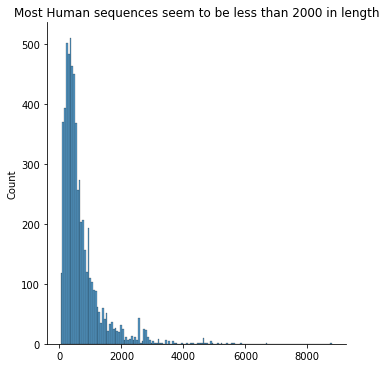

In [ ]:
lengths = sorted(len(s) for s in df_train['Human'])
print("Median length of Human sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Human sequences seem to be less than 2000 in length")

Median length of Yersinia sequence is 336


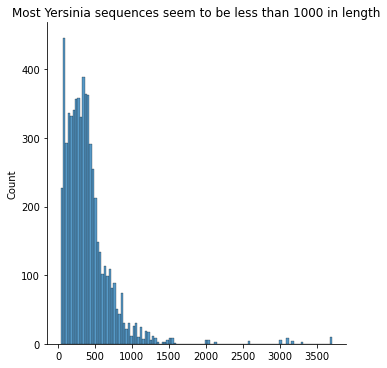

In [ ]:
lengths = sorted(len(s) for s in df_train['Yersinia'])
print("Median length of Yersinia sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Yersinia sequences seem to be less than 1000 in length")

Median length of Joined sequence is 881


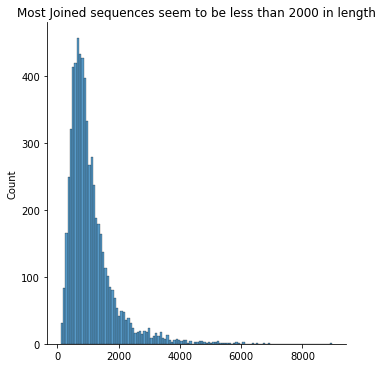

In [ ]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 100
MAX_SEQUENCE_LENGTH is 1500
max sequences1_train length: 8797
min sequences1_train length: 41
median sequences1_train length: 479


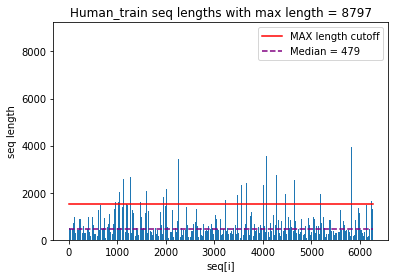

max word index sequences1_train: 20
max sequences2_train length: 3710
min sequences2_train length: 35
median sequences2_train length: 336


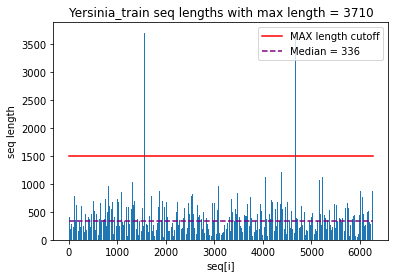

max word index sequences2_train: 20
Found 20 unique tokens in tokenizer1.
Found 20 unique tokens in tokenizer2.
Center padding
Shape of data1 tensor: (6270, 1500)
Shape of data2 tensor: (6270, 1500)
max test_sequences1 length: 5635
min test_sequences1 length: 39
median test_sequences1 length: 496


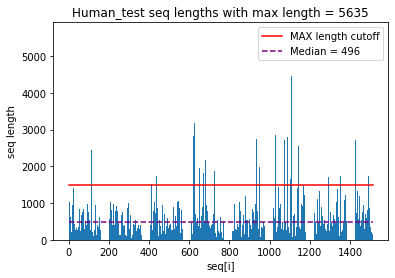

max test_sequences2 length: 3710
min test_sequences2 length: 35
median test_sequences2 length: 331


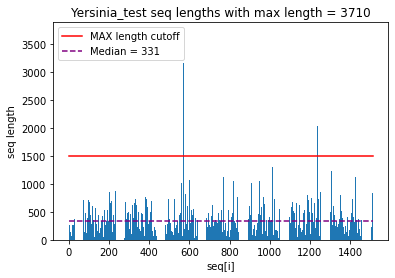

Center padding for test seq.
Shape of test_data1 tensor: (1514, 1500)
Shape of test_data2 tensor: (1514, 1500)
num_words is 21


In [3]:
data1_1D_doubleip,data2_1D_doubleip,data1_test_1D_doubleip,data2_test_1D_doubleip,num_words_1D,MAX_SEQUENCE_LENGTH_1D_dIP,MAX_VOCAB_SIZE_1D = f.get_seq_data_doubleip(100,1500,df_train,df_test, pad='center', show =True)

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 1500
max sequence_data length: 8966
min sequence_data length: 107
median sequence_data length: 881


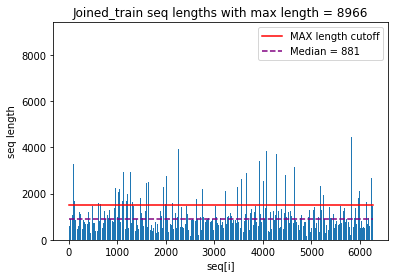

max word index: 20
Found 20 unique tokens.
Center padding.
Shape of data tensor: (6270, 1500)
max sequences_test length: 6126
min sequences_test length: 134
median sequences_test length: 901


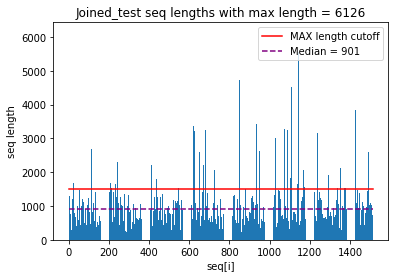

Center padding for test seq.
Shape of data_test tensor: (1514, 1500)
num_words is 21


In [4]:
data_1D_join,data_test_1D_join,num_words_1D,MAX_SEQUENCE_LENGTH_1D_J,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(1000,1500,df_train,df_test,pad='center', show =True)

In [5]:
EMBEDDING_DIM_1D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 40
DROPOUT = 0.6

ip = Input(shape=(MAX_SEQUENCE_LENGTH_1D_J,))
x = Embedding(num_words_1D, EMBEDDING_DIM_1D, input_length=MAX_SEQUENCE_LENGTH_1D_J,trainable=True)(ip)
x = Conv1D(32, 3, activation='relu')(x)
x = Dropout(DROPOUT)(x)
x = MaxPooling1D(3)(x)
x= Flatten()(x)
x = Dropout(DROPOUT)(x)
x = Dense(128, activation='relu')(x)
x_1D_Joined = Model(inputs=ip, outputs=x)

inputA = Input(shape=(MAX_SEQUENCE_LENGTH_1D_dIP,))
x1 = Embedding(num_words_1D, EMBEDDING_DIM_1D, input_length=MAX_SEQUENCE_LENGTH_1D_dIP,trainable=True)(inputA)
x1 = Conv1D(32, 3, activation='relu')(x1)
x1= Dropout(DROPOUT)(x1)
x1 = MaxPooling1D(3)(x1)
x1= Flatten()(x1)
x1 = Dropout(DROPOUT)(x1)
x1 = Dense(128, activation='relu')(x1)
# x1 = Dropout(DROPOUT)(x1)
# x1 = Dense(1, activation='sigmoid')(x1)
x1_Human_1D_doubleip = Model(inputs=inputA, outputs=x1)

inputB = Input(shape=(MAX_SEQUENCE_LENGTH_1D_dIP,))
x2 = Embedding(num_words_1D, EMBEDDING_DIM_1D, input_length=MAX_SEQUENCE_LENGTH_1D_dIP,trainable=True)(inputB)
x2 = Conv1D(32, 3, activation='relu')(x2)
x2= Dropout(DROPOUT)(x2)
x2 = MaxPooling1D(3)(x2)
x2= Flatten()(x2)
x2 = Dropout(DROPOUT)(x2)
x2 = Dense(128, activation='relu')(x2)
# x2 = Dropout(DROPOUT)(x2)
# x2 = Dense(1, activation='sigmoid')(x2)
x2_Yersinia_1D_doubleip = Model(inputs=inputB, outputs=x2)

concatenator = Concatenate(axis=1)
y = concatenator([x_1D_Joined.output,x1_Human_1D_doubleip.output, x2_Yersinia_1D_doubleip.output])
y = Dropout(DROPOUT)(y)
y = Dense(128, activation='relu')(y)
y = Dropout(DROPOUT)(y)
output = Dense(1, activation="sigmoid")(y)

model1D_CNN_combine = Model(inputs=[x_1D_Joined.input,x1_Human_1D_doubleip.input, x2_Yersinia_1D_doubleip.input], outputs=output)


model1D_CNN_combine.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#plot_model(model1D_CNN_combine, to_file='model_plot.png', show_shapes=True, show_layer_names=False)


In [6]:
model1D_CNN_combine.fit([data_1D_join,data1_1D_doubleip,data2_1D_doubleip], df_train['label'].values, epochs=EPOCHS, validation_data=([data_test_1D_join,data1_test_1D_doubleip,data2_test_1D_doubleip], df_test['label'].values))
print(roc_auc_score(df_test['label'].values, model1D_CNN_combine.predict([data_test_1D_join,data1_test_1D_doubleip,data2_test_1D_doubleip])))

#asd


Epoch 1/40
196/196 [==============================] - 20s 13ms/step - loss: 0.6560 - accuracy: 0.6172 - val_loss: 0.6082 - val_accuracy: 0.6856
Epoch 2/40
196/196 [==============================] - 2s 10ms/step - loss: 0.6165 - accuracy: 0.6743 - val_loss: 0.5882 - val_accuracy: 0.6948
Epoch 3/40
196/196 [==============================] - 2s 11ms/step - loss: 0.5872 - accuracy: 0.6892 - val_loss: 0.5607 - val_accuracy: 0.7100
Epoch 4/40
196/196 [==============================] - 2s 11ms/step - loss: 0.5588 - accuracy: 0.7114 - val_loss: 0.5395 - val_accuracy: 0.7107
Epoch 5/40
196/196 [==============================] - 2s 10ms/step - loss: 0.5228 - accuracy: 0.7348 - val_loss: 0.5109 - val_accuracy: 0.7398
Epoch 6/40
196/196 [==============================] - 2s 10ms/step - loss: 0.5000 - accuracy: 0.7422 - val_loss: 0.4944 - val_accuracy: 0.7530
Epoch 7/40
196/196 [==============================] - 2s 10ms/step - loss: 0.4774 - accuracy: 0.7689 - val_loss: 0.4886 - val_accuracy: 0.764

In [7]:
data1_1D_doubleip,data2_1D_doubleip,data1_test_1D_doubleip,data2_test_1D_doubleip,num_words_1D,MAX_SEQUENCE_LENGTH_1D_dIP,MAX_VOCAB_SIZE_1D = f.get_seq_data_doubleip(100,1500,df_train,df_test, pad='pre')
data_1D_join,data_test_1D_join,num_words_1D,MAX_SEQUENCE_LENGTH_1D_J,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(1000,1500,df_train,df_test,pad='pre')

MAX_VOCAB_SIZE is 100
MAX_SEQUENCE_LENGTH is 1500
max sequences1_train length: 8797
min sequences1_train length: 41
median sequences1_train length: 479
max word index sequences1_train: 20
max sequences2_train length: 3710
min sequences2_train length: 35
median sequences2_train length: 336
max word index sequences2_train: 20
Found 20 unique tokens in tokenizer1.
Found 20 unique tokens in tokenizer2.
pre padding
Shape of data1 tensor: (6270, 1500)
Shape of data2 tensor: (6270, 1500)
max test_sequences1 length: 5635
min test_sequences1 length: 39
median test_sequences1 length: 496
max test_sequences2 length: 3710
min test_sequences2 length: 35
median test_sequences2 length: 331
pre padding for test seq.
Shape of test_data1 tensor: (1514, 1500)
Shape of test_data2 tensor: (1514, 1500)
num_words is 21
MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 1500
max sequence_data length: 8966
min sequence_data length: 107
median sequence_data length: 881
max word index: 20
Found 20 unique tokens.
pre 

In [8]:
EMBEDDING_DIM_1D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 40
DROPOUT = 0.6

ip = Input(shape=(MAX_SEQUENCE_LENGTH_1D_J,))
x = Embedding(num_words_1D, EMBEDDING_DIM_1D, input_length=MAX_SEQUENCE_LENGTH_1D_J,trainable=True)(ip)
x = Conv1D(32, 3, activation='relu')(x)
x = Dropout(DROPOUT)(x)
x = MaxPooling1D(3)(x)
x= Flatten()(x)
x = Dropout(DROPOUT)(x)
x = Dense(128, activation='relu')(x)
x_1D_Joined = Model(inputs=ip, outputs=x)

inputA = Input(shape=(MAX_SEQUENCE_LENGTH_1D_dIP,))
x1 = Embedding(num_words_1D, EMBEDDING_DIM_1D, input_length=MAX_SEQUENCE_LENGTH_1D_dIP,trainable=True)(inputA)
x1 = Conv1D(32, 3, activation='relu')(x1)
x1= Dropout(DROPOUT)(x1)
x1 = MaxPooling1D(3)(x1)
x1= Flatten()(x1)
x1 = Dropout(DROPOUT)(x1)
x1 = Dense(128, activation='relu')(x1)
# x1 = Dropout(DROPOUT)(x1)
# x1 = Dense(1, activation='sigmoid')(x1)
x1_Human_1D_doubleip = Model(inputs=inputA, outputs=x1)

inputB = Input(shape=(MAX_SEQUENCE_LENGTH_1D_dIP,))
x2 = Embedding(num_words_1D, EMBEDDING_DIM_1D, input_length=MAX_SEQUENCE_LENGTH_1D_dIP,trainable=True)(inputB)
x2 = Conv1D(32, 3, activation='relu')(x2)
x2= Dropout(DROPOUT)(x2)
x2 = MaxPooling1D(3)(x2)
x2= Flatten()(x2)
x2 = Dropout(DROPOUT)(x2)
x2 = Dense(128, activation='relu')(x2)
# x2 = Dropout(DROPOUT)(x2)
# x2 = Dense(1, activation='sigmoid')(x2)
x2_Yersinia_1D_doubleip = Model(inputs=inputB, outputs=x2)

concatenator = Concatenate(axis=1)
y = concatenator([x_1D_Joined.output,x1_Human_1D_doubleip.output, x2_Yersinia_1D_doubleip.output])
y = Dropout(DROPOUT)(y)
y = Dense(128, activation='relu')(y)
y = Dropout(DROPOUT)(y)
output = Dense(1, activation="sigmoid")(y)

model1D_CNN_combine = Model(inputs=[x_1D_Joined.input,x1_Human_1D_doubleip.input, x2_Yersinia_1D_doubleip.input], outputs=output)


model1D_CNN_combine.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#plot_model(model1D_CNN_combine, to_file='model_plot.png', show_shapes=True, show_layer_names=False)
model1D_CNN_combine.fit([data_1D_join,data1_1D_doubleip,data2_1D_doubleip], df_train['label'].values, epochs=EPOCHS, validation_data=([data_test_1D_join,data1_test_1D_doubleip,data2_test_1D_doubleip], df_test['label'].values))
print(roc_auc_score(df_test['label'].values, model1D_CNN_combine.predict([data_test_1D_join,data1_test_1D_doubleip,data2_test_1D_doubleip])))


Epoch 1/40
196/196 [==============================] - 3s 11ms/step - loss: 0.6661 - accuracy: 0.5956 - val_loss: 0.6076 - val_accuracy: 0.6863
Epoch 2/40
196/196 [==============================] - 2s 10ms/step - loss: 0.6236 - accuracy: 0.6666 - val_loss: 0.5870 - val_accuracy: 0.6955
Epoch 3/40
196/196 [==============================] - 2s 10ms/step - loss: 0.5852 - accuracy: 0.6801 - val_loss: 0.5639 - val_accuracy: 0.7206
Epoch 4/40
196/196 [==============================] - 2s 10ms/step - loss: 0.5690 - accuracy: 0.7074 - val_loss: 0.5435 - val_accuracy: 0.7173
Epoch 5/40
196/196 [==============================] - 2s 10ms/step - loss: 0.5333 - accuracy: 0.7241 - val_loss: 0.5158 - val_accuracy: 0.7371
Epoch 6/40
196/196 [==============================] - 2s 10ms/step - loss: 0.4876 - accuracy: 0.7599 - val_loss: 0.5147 - val_accuracy: 0.7398
Epoch 7/40
196/196 [==============================] - 2s 10ms/step - loss: 0.4843 - accuracy: 0.7648 - val_loss: 0.4955 - val_accuracy: 0.7662